In [46]:
import pandas as pd

In [47]:
# opening of dataset
dataset = pd.read_excel("SaobracajneNezgode2021.xlsx", header=0)
dataset

,ZavodniBroj,Grad,Opstina,Datum,Datum1,Longitude,latitude,VrstaNezgode,VrstaStete,OpisNezgode
0,1309622,BEOGRAD,BARAJEVO,"01.01.2021,07:00",2021-01-01 07:00:00,20.335314,44.583922,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smer...
1,1310786,BEOGRAD,BARAJEVO,"09.01.2021,13:00",2021-01-09 13:00:00,20.408270,44.616320,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PREL...,Najmanje dva vozila koja se kreću istim putem ...
2,1311367,BEOGRAD,BARAJEVO,"12.01.2021,05:30",2021-01-12 05:30:00,20.410785,44.635801,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu
3,1310960,BEOGRAD,BARAJEVO,"17.01.2021,02:15",2021-01-17 02:15:00,20.418050,44.582760,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom – silazak sa kolovoz...
4,1311121,BEOGRAD,BARAJEVO,"18.01.2021,20:40",2021-01-18 20:40:00,20.304910,44.571220,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smer...
...,...,...,...,...,...,...,...,...,...,...
660264,1350223,ŠABAC,ŠABAC,"30.12.2021,21:00",2021-12-30 21:00:00,19.664345,44.748302,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Ostale nezgode sa najmanje dva vozila – suprot...
660265,1350220,ŠABAC,ŠABAC,"30.12.2021,20:35",2021-12-30 20:35:00,19.651390,44.667294,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom na kolovozu
660266,1350356,ŠABAC,ŠABAC,"31.12.2021,15:40",2021-12-31 15:40:00,19.716304,44.759115,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smer...
660267,1350287,ŠABAC,ŠABAC,"31.12.2021,11:40",2021-12-31 11:40:00,19.754143,44.734925,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – BEZ SKRETANjA,Najmanje dva vozila koja se kreću u istom smer...


In [48]:
# Renaming and dropping unnecessary columns and creating a copy of original dataset
working_set = dataset.copy()
working_set = working_set.drop(columns="Datum")
working_set.rename(columns={"Datum1":"Datum", "Longitude":"longitude"}, inplace = True)
working_set.columns

Index(['ZavodniBroj', 'Grad', 'Opstina', 'Datum', 'longitude', 'latitude',
       'VrstaNezgode', 'VrstaStete', 'OpisNezgode'],
      dtype='object')

In [49]:
# checking information of set
working_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660269 entries, 0 to 660268
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ZavodniBroj   660269 non-null  int64         
 1   Grad          660269 non-null  object        
 2   Opstina       660269 non-null  object        
 3   Datum         660269 non-null  datetime64[ns]
 4   longitude     660269 non-null  float64       
 5   latitude      660269 non-null  float64       
 6   VrstaNezgode  660269 non-null  object        
 7   VrstaStete    660269 non-null  object        
 8   OpisNezgode   660269 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 45.3+ MB


In [50]:
# unique accidents and number for each, also creating variable for bar plot

counting = working_set["VrstaNezgode"].value_counts()
counting

Sa mat.stetom     397157
Sa povredjenim    253802
Sa poginulim        9310
Name: VrstaNezgode, dtype: int64

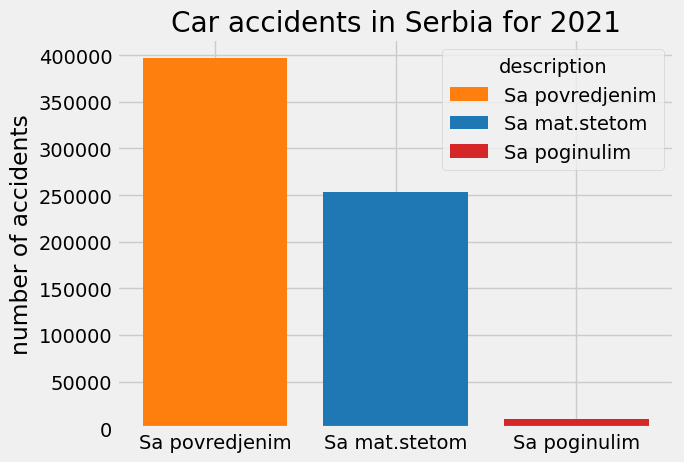

In [51]:
# simple bar plot for different type of car accidents

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar_labels = working_set["VrstaNezgode"].unique()
bar_colors = ['tab:orange', 'tab:blue', 'tab:red']

ax.bar(bar_labels, counting, label=bar_labels, color=bar_colors)

ax.set_ylabel('number of accidents')
ax.set_title('Car accidents in Serbia for 2021')
ax.legend(title='description')

plt.show()

In [52]:
# here I defined area for bounding box defined by min and max
# of longitude and latitude from dataset

bounding_box = (working_set.longitude.min(), 
working_set.longitude.max(), 
working_set.latitude.min(), 
working_set.latitude.max())

In [53]:
# I got a image from openstreetmap.org by defined min and max of longitude and latitude
img_map = plt.imread('/Users/zoranmilovanovic/Google Drive/car_accidents_python_charts/map.png')

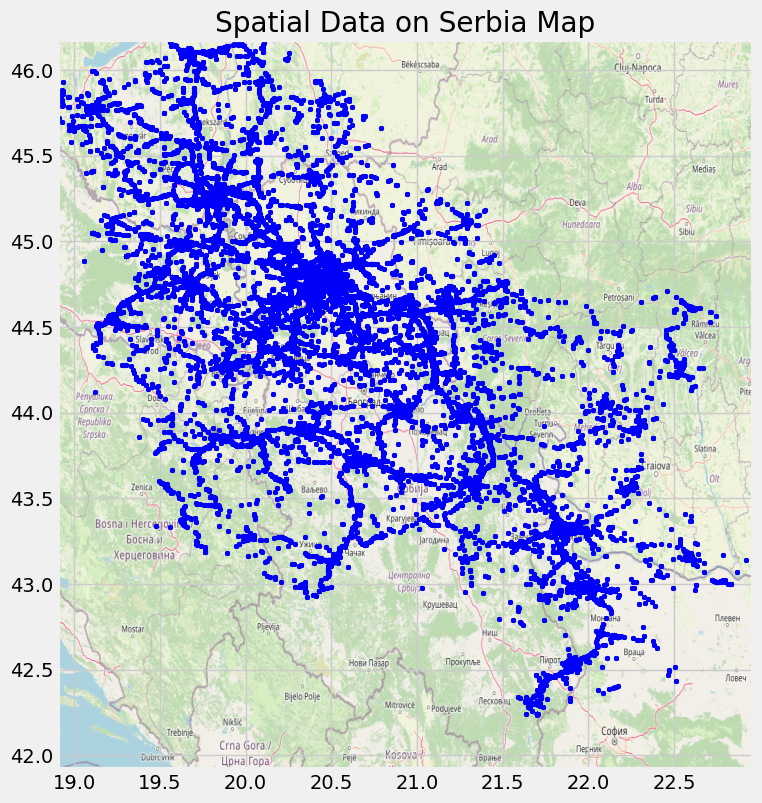

In [54]:
# Here I ploted working_set.longitude and working_set.latitude as scatter points on exported image
# "map.png", it is important to set up the X-axis and Y-axis as per bounding_box
fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(working_set.longitude, working_set.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Spatial Data on Serbia Map')
ax.set_xlim(bounding_box[0],bounding_box[1])
ax.set_ylim(bounding_box[2],bounding_box[3])
ax.imshow(img_map, zorder=0, extent = bounding_box, aspect= 'equal')